<a href="https://colab.research.google.com/github/kartikjoshi267/placement_prediction/blob/main/Student_Placement_Prediction_Second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.impute import SimpleImputer
warnings.filterwarnings('ignore')

In [120]:
data = pd.read_csv("https://gist.githubusercontent.com/kartikjoshi267/12c51dec6aa493a6df2a00d239e7aa54/raw/f2bf2c6f63fa35a53ab8b761afd0b44636f95fe5/placement_data_new.csv")
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [121]:
data.drop(columns='sl_no', inplace=True)
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [122]:
data.describe().round(2)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.00,215.00,215.00,215.00,215.00,148.00
mean,67.30,66.33,66.37,72.10,62.28,288655.41
std,10.83,10.90,7.36,13.28,5.83,93457.45
min,40.89,37.00,50.00,50.00,51.21,200000.00
25%,60.60,60.90,61.00,60.00,57.94,240000.00
50%,67.00,65.00,66.00,71.00,62.00,265000.00
75%,75.70,73.00,72.00,83.50,66.26,300000.00
max,89.40,97.70,91.00,98.00,77.89,940000.00


In [123]:
data.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [124]:
imputer = SimpleImputer(strategy="mean")
data["salary"] = imputer.fit_transform(data[["salary"]])[:, 0]
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


In [125]:
numerical_cols = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_cols = [feature for feature in data.columns if data[feature].dtype == 'O']

categorical_classes = {}

In [126]:
numerical_cols

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [127]:
categorical_cols

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

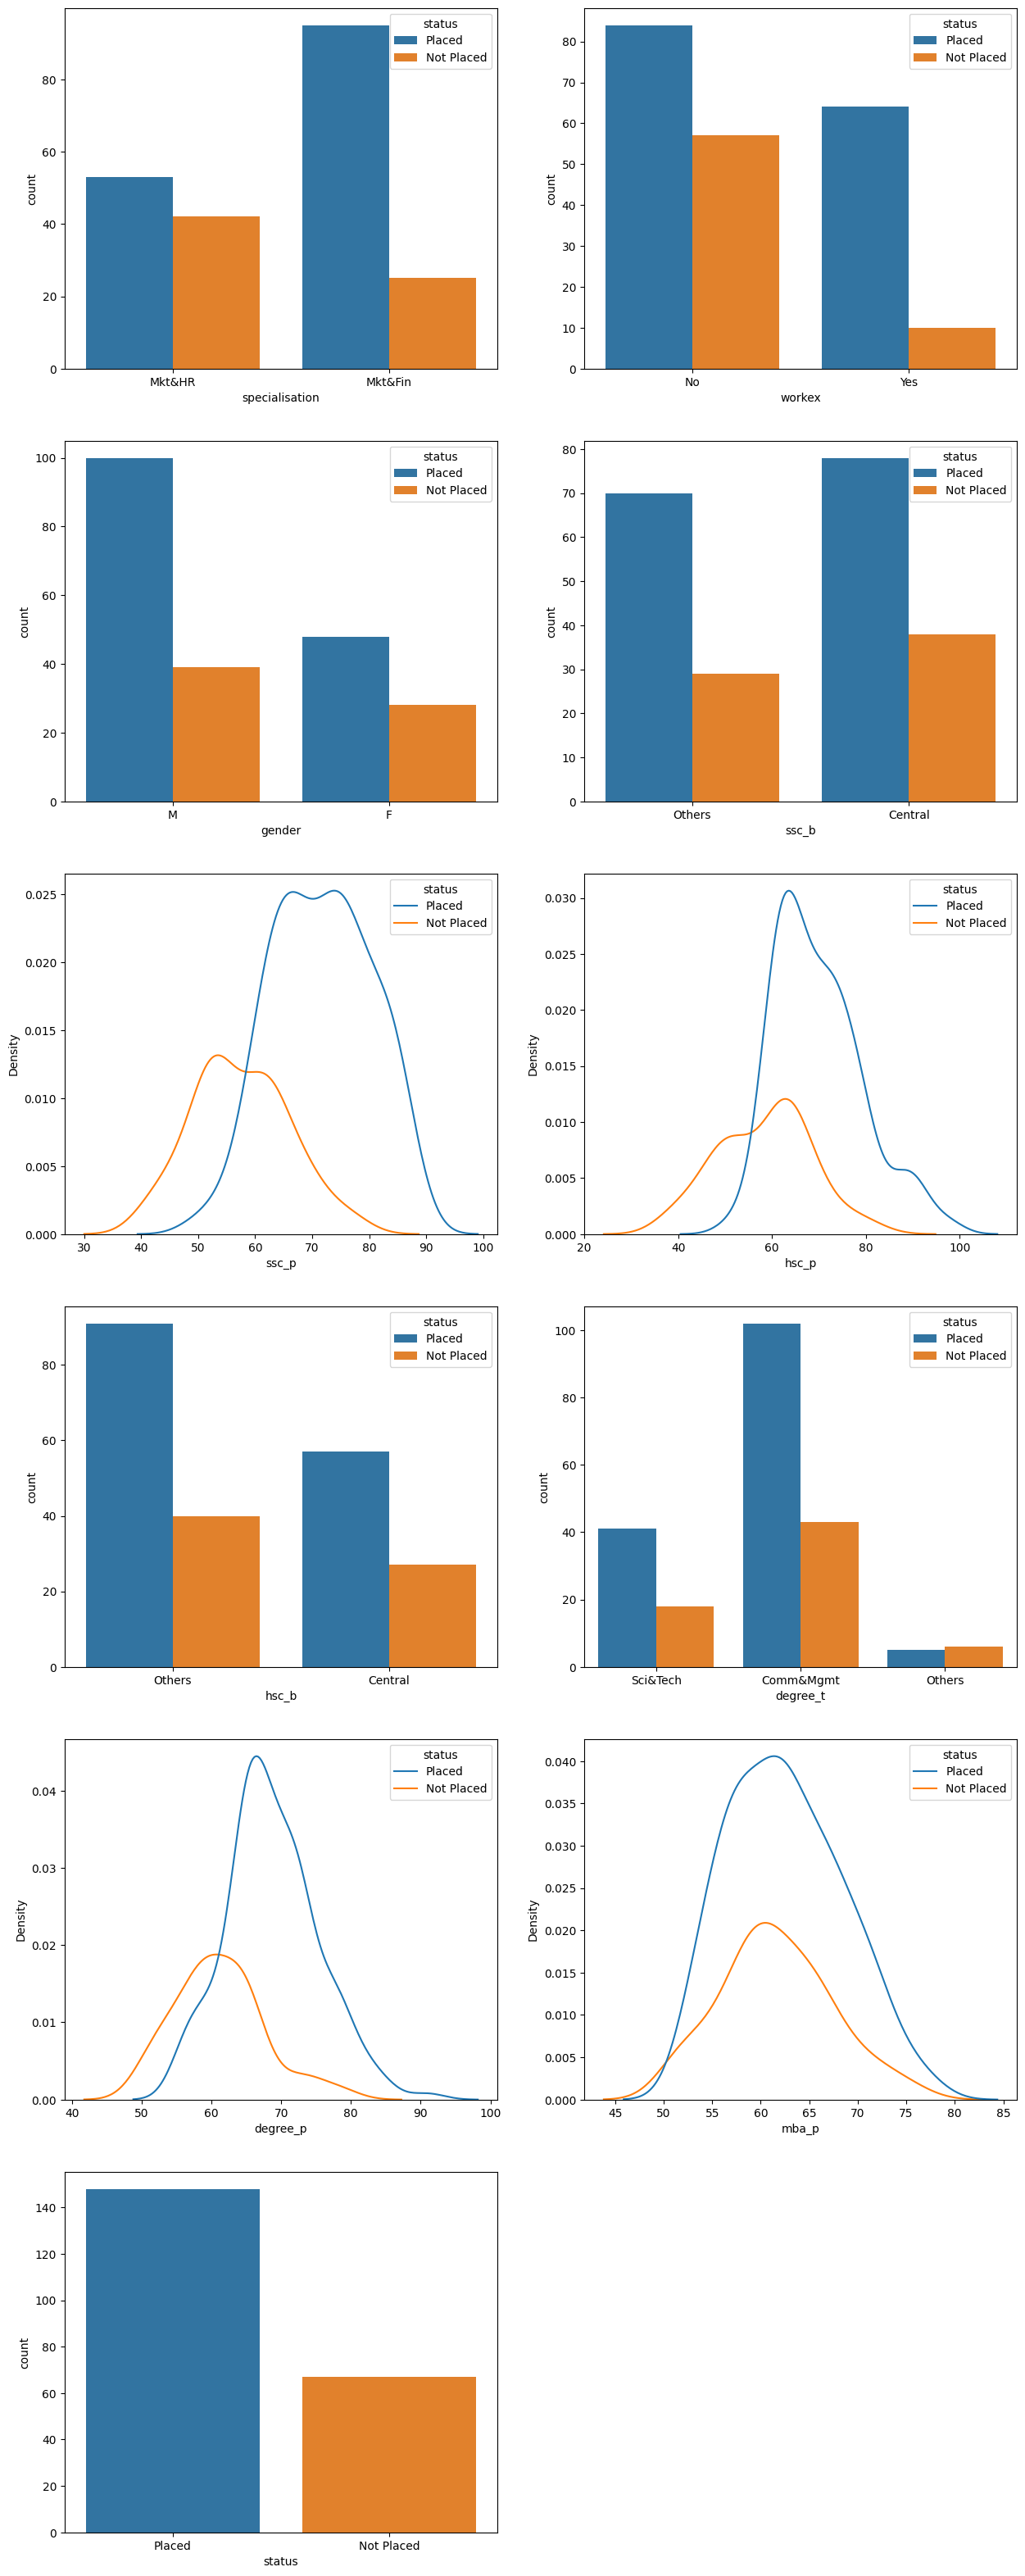

In [128]:
fig, ax = plt.subplots(6, 2)
fig.set_figheight(40)
fig.set_figwidth(15)

# KDE - Kernel Density Estimate

sns.countplot(x=data['specialisation'], ax=ax[0,0], hue=data['status'])
sns.countplot(x=data['workex'], ax=ax[0,1], hue=data['status'])
sns.countplot(x=data['gender'], ax=ax[1,0], hue=data['status'])
sns.countplot(x=data['ssc_b'], ax=ax[1,1], hue=data['status'])
sns.kdeplot(x=data['ssc_p'], ax=ax[2,0], hue=data['status'])
sns.kdeplot(x=data['hsc_p'], ax=ax[2,1], hue=data['status'])
sns.countplot(x=data['hsc_b'], ax=ax[3,0], hue=data['status'])
sns.countplot(x=data['degree_t'], ax=ax[3,1], hue=data['status'])
sns.kdeplot(x=data['degree_p'], ax=ax[4,0], hue=data['status'])
sns.kdeplot(x=data['mba_p'], ax=ax[4,1], hue=data['status'])
sns.countplot(x=data['status'], ax=ax[5,0], hue=data['status'])
ax[5,1].set_axis_off()
plt.show()

In [129]:
from sklearn.preprocessing import LabelEncoder
dataForCorr = data

In [130]:
le = LabelEncoder()
for i in categorical_cols:
  dataForCorr[i] = le.fit_transform(dataForCorr[i])
  categorical_classes[i] = le.classes_

dataForCorr.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.000000
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.000000
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.000000
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,288655.405405
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.000000


In [131]:
categorical_classes

{'gender': array(['F', 'M'], dtype=object),
 'ssc_b': array(['Central', 'Others'], dtype=object),
 'hsc_b': array(['Central', 'Others'], dtype=object),
 'hsc_s': array(['Arts', 'Commerce', 'Science'], dtype=object),
 'degree_t': array(['Comm&Mgmt', 'Others', 'Sci&Tech'], dtype=object),
 'workex': array(['No', 'Yes'], dtype=object),
 'specialisation': array(['Mkt&Fin', 'Mkt&HR'], dtype=object),
 'status': array(['Not Placed', 'Placed'], dtype=object)}

In [132]:
correlation_matrix = dataForCorr.corr()
correlation_matrix

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
gender,1.000000,-0.068969,0.019429,-0.021334,0.065945,0.071827,-0.173217,0.061345,0.085153,0.084294,-0.106160,-0.300531,9.067040e-02,1.291073e-01
ssc_p,-0.068969,1.000000,0.116194,0.511472,0.066996,0.236364,0.538404,0.205896,0.175675,0.261993,-0.172536,0.388478,6.078887e-01,2.357072e-02
ssc_b,0.019429,0.116194,1.000000,-0.137013,0.605883,0.050919,0.038070,0.100863,-0.040744,-0.018991,-0.051565,0.083120,3.729651e-02,4.603322e-03
hsc_p,-0.021334,0.511472,-0.137013,1.000000,-0.019548,-0.164091,0.434206,-0.086450,0.141025,0.245113,-0.241630,0.354823,4.912279e-01,5.450558e-02
hsc_b,0.065945,0.066996,0.605883,-0.019548,1.000000,0.152227,0.067229,0.057960,0.038357,0.039108,0.002232,0.090201,1.694454e-02,-6.247140e-03
hsc_s,0.071827,0.236364,0.050919,-0.164091,0.152227,1.000000,0.137276,0.596300,0.007856,0.075643,0.172107,0.039345,3.344214e-02,5.998181e-02
degree_p,-0.173217,0.538404,0.038070,0.434206,0.067229,0.137276,1.000000,0.079317,0.122648,0.224470,-0.218286,0.402364,4.798610e-01,-1.414817e-02
degree_t,0.061345,0.205896,0.100863,-0.086450,0.057960,0.596300,0.079317,1.000000,0.105816,0.011509,0.084361,0.116666,-2.035216e-02,1.414271e-01
workex,0.085153,0.175675,-0.040744,0.141025,0.038357,0.007856,0.122648,0.105816,1.000000,0.056735,-0.191174,0.168811,2.760600e-01,1.184562e-01
etest_p,0.084294,0.261993,-0.018991,0.245113,0.039108,0.075643,0.224470,0.011509,0.056735,1.000000,-0.236315,0.218055,1.276394e-01,1.528286e-01


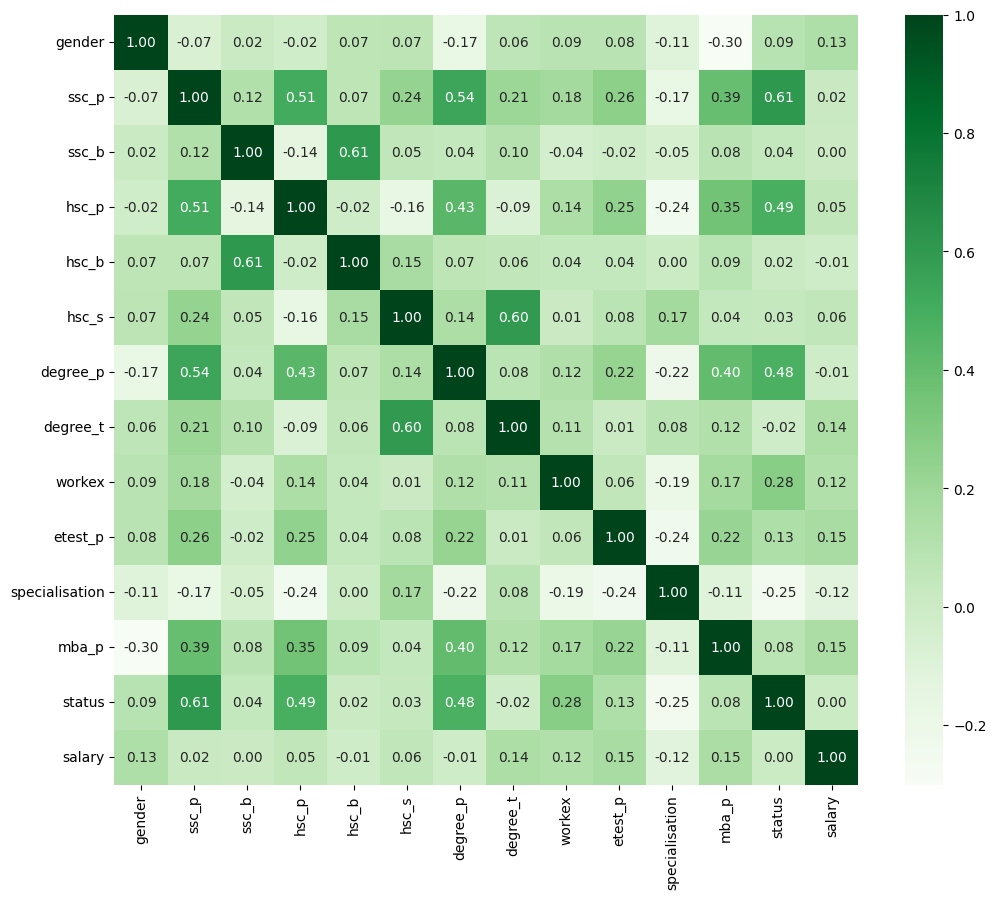

In [133]:
# Visualization of above correlation matrix using heatmap
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(12)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Greens')
plt.show()

In [134]:
x=data.drop(labels=['status'], axis=1)
xForCorr = dataForCorr.drop(labels=['status'], axis=1)
x

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,270000.000000
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,200000.000000
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,250000.000000
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,288655.405405
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,400000.000000
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,275000.000000
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,295000.000000
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,204000.000000


In [135]:
y=data.status
yForCorr=dataForCorr.status
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int64

In [136]:
categorical_cols.remove('status')
categorical_cols

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

<Axes: >

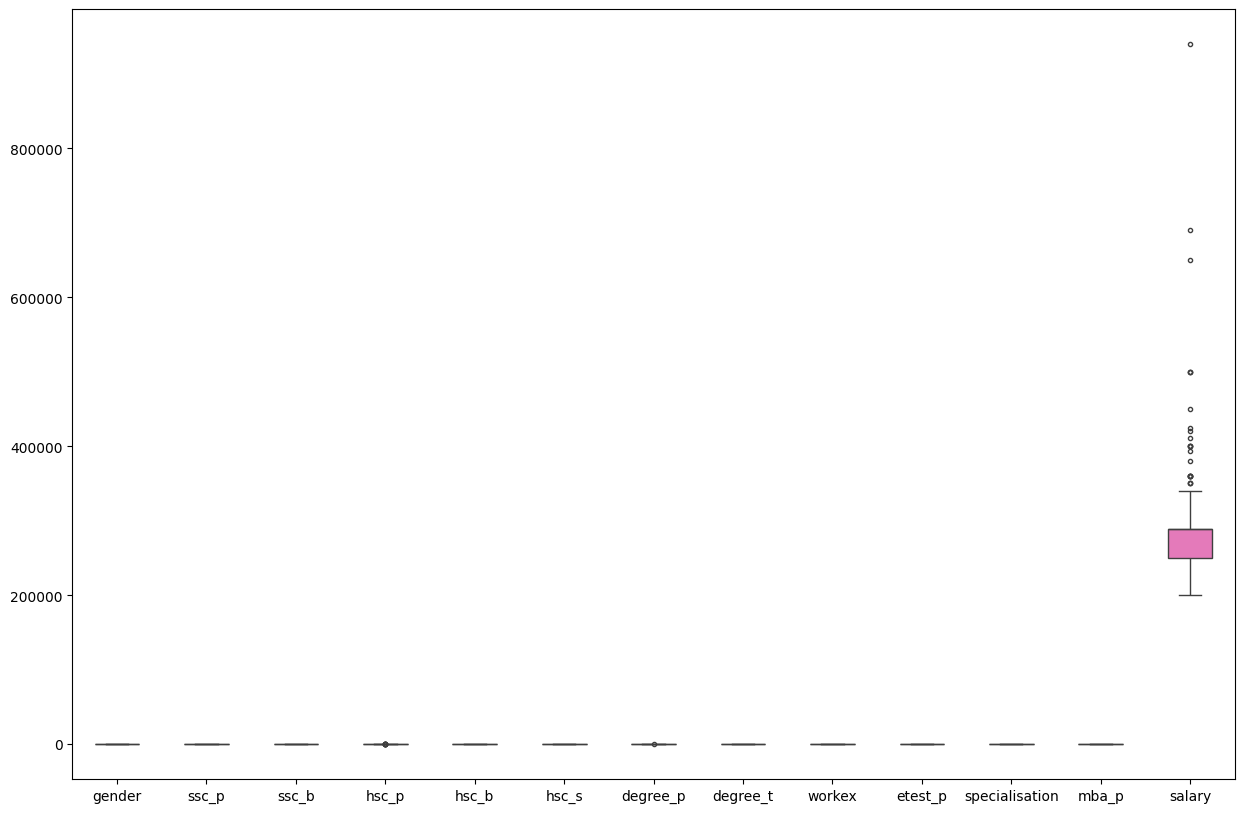

In [137]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=xForCorr, width= 0.5,ax=ax,  fliersize=3)

In [138]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [139]:
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='mean')),
        ('scaler',StandardScaler())
    ]
)
cat_pipeline=Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehotencoder', OneHotEncoder())
    ]
)

In [140]:
preprocessor=ColumnTransformer([
    ('num_pipeline', num_pipeline, numerical_cols),
    ('cat_pipeline', cat_pipeline, categorical_cols)
])

In [141]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.1, random_state=42)

In [142]:
x_train=preprocessor.fit_transform(x_train)
x_train
x_test=preprocessor.transform(x_test)
preprocessor.get_feature_names_out()

array(['num_pipeline__ssc_p', 'num_pipeline__hsc_p',
       'num_pipeline__degree_p', 'num_pipeline__etest_p',
       'num_pipeline__mba_p', 'num_pipeline__salary',
       'cat_pipeline__gender_0', 'cat_pipeline__gender_1',
       'cat_pipeline__ssc_b_0', 'cat_pipeline__ssc_b_1',
       'cat_pipeline__hsc_b_0', 'cat_pipeline__hsc_b_1',
       'cat_pipeline__hsc_s_0', 'cat_pipeline__hsc_s_1',
       'cat_pipeline__hsc_s_2', 'cat_pipeline__degree_t_0',
       'cat_pipeline__degree_t_1', 'cat_pipeline__degree_t_2',
       'cat_pipeline__workex_0', 'cat_pipeline__workex_1',
       'cat_pipeline__specialisation_0', 'cat_pipeline__specialisation_1'],
      dtype=object)

<Axes: >

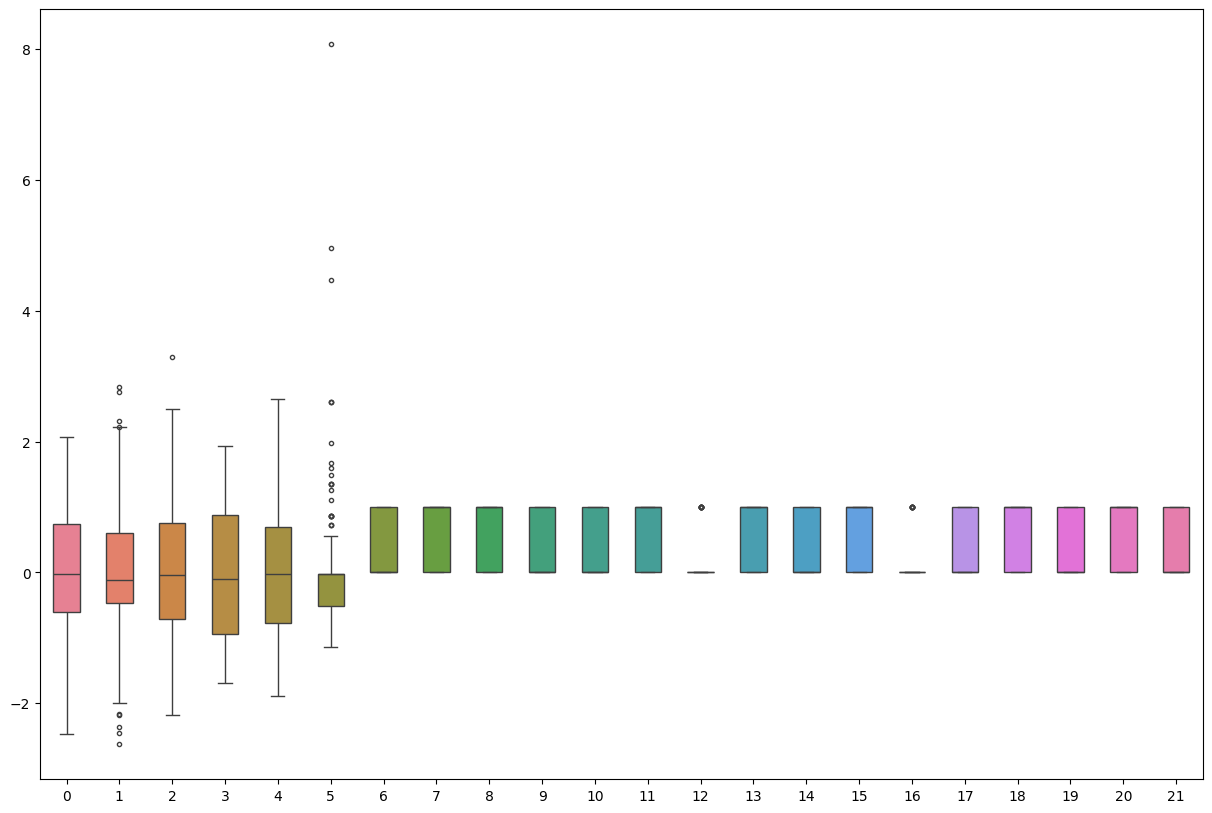

In [143]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=x_train , width= 0.5,ax=ax,  fliersize=3)

In [144]:
%pip install logitboost
%pip install xgboost

In [145]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from logitboost import LogitBoost
import xgboost as xgb

models={
    # 'logistic_regression':LogisticRegression(),
    # 'support_vector':SVC(),
    # 'random_forest':RandomForestClassifier(),
    # 'naive_bayes': GaussianNB(),
    # 'decision_tree':DecisionTreeClassifier(),
    'KNN':KNeighborsClassifier(),
    'Adaboost':AdaBoostClassifier(),
    'Logitboost': LogitBoost(),
    'Xgboost': xgb.XGBClassifier()
}

In [146]:
from sklearn.metrics import accuracy_score
def evaluate_model(x_train, y_train, x_test, y_test, models):
    report={}
    for i in range(len(models)):
        model=list(models.values())[i]
        model.fit(x_train, y_train)
        y_pred=model.predict(x_test)
        test_model_score=accuracy_score(y_test, y_pred)
        report[list(models.keys())[i]]=test_model_score*100
    return sorted(report.items(), key=lambda kv: (kv[1], kv[0]))

In [147]:
evaluate_model(x_train, y_train, x_test, y_test, models)

[('KNN', 77.27272727272727),
 ('Xgboost', 90.9090909090909),
 ('Adaboost', 95.45454545454545),
 ('Logitboost', 95.45454545454545)]

In [148]:
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_test).value_counts())
print(pd.DataFrame(y_train).value_counts())

status
1         148
0          67
Name: count, dtype: int64
status
1         15
0          7
Name: count, dtype: int64
status
1         133
0          60
Name: count, dtype: int64


In [149]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR

print(AdaBoostClassifier().get_params())

model = RandomizedSearchCV(AdaBoostClassifier(), param_distributions={
  # 'base_estimator': [None, LinearRegression(), LinearSVR()],
  'n_estimators': [i for i in range(1, 61)],
  'random_state': [None, 42, 1],
  # 'objective': ['binary:rawlogit', 'binary:logistic']
}, cv=5)

{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}


In [150]:
model.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                        'random_state': [None, 42, 1]})

In [151]:
model.best_params_

{'random_state': 1, 'n_estimators': 21}

In [152]:
model.score(x_train, y_train)

1.0

In [153]:
model.score(x_test, y_test)

0.9545454545454546

Text(0.5, 1.0, 'Adaboost')

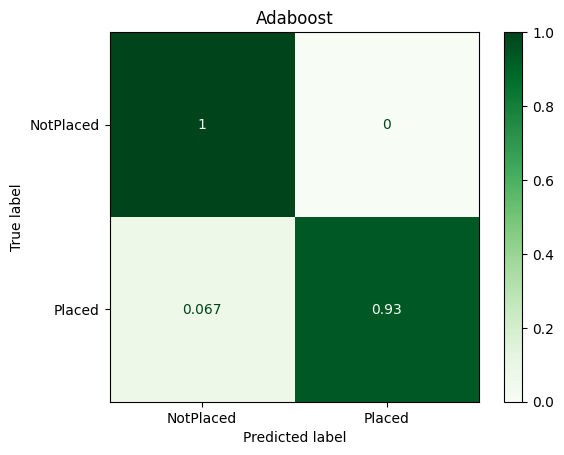

In [154]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

target_names=['NotPlaced','Placed']

cfm = confusion_matrix(y_test, model.predict(x_test), normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cfm, display_labels=target_names).plot(cmap='Greens')
plt.title('Adaboost')

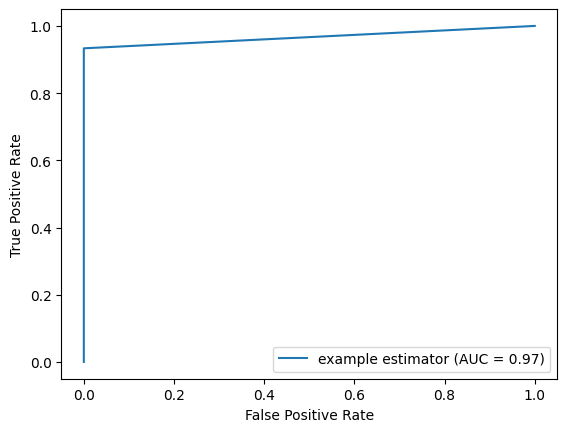

In [155]:
from sklearn.metrics import accuracy_score, roc_curve, recall_score, precision_score, RocCurveDisplay, auc, f1_score
pred = model.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()
# roc_curve(y_true=y_test, y_score=model.predict(x_test))

In [156]:
recall_score(y_test, pred)

0.9333333333333333

In [157]:
precision_score(y_test, pred)

1.0

In [158]:
accuracy_score(y_test, pred)

0.9545454545454546

In [159]:
f1_score(y_test, pred)

0.9655172413793104

In [160]:
%pip install tabulate lightgbm

In [161]:
def sensitivity_specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    return sensitivity, specificity

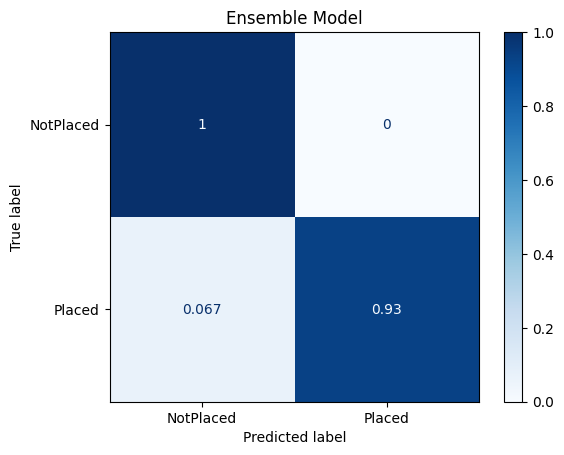


Ensemble Model of SVM and Logistic Regression Evaluation Metrics:
╒═════════════╤══════════╕
│ Metric      │    Value │
╞═════════════╪══════════╡
│ Accuracy    │ 0.954545 │
├─────────────┼──────────┤
│ Precision   │ 0.960227 │
├─────────────┼──────────┤
│ Recall      │ 0.954545 │
├─────────────┼──────────┤
│ F1 Score    │ 0.955277 │
├─────────────┼──────────┤
│ Sensitivity │ 0.933333 │
├─────────────┼──────────┤
│ Specificity │ 1        │
╘═════════════╧══════════╛


In [162]:
from sklearn.ensemble import VotingClassifier
from tabulate import tabulate
from lightgbm import LGBMClassifier

ensemble_model = VotingClassifier(estimators=[
    ('svm', LogitBoost()),
    ('lr', AdaBoostClassifier())
], voting='soft')

ensemble_model.fit(x_train, y_train)

y_pred_ensemble = ensemble_model.predict(x_test)

cm_ensemble = confusion_matrix(y_test, y_pred_ensemble, normalize='true')

ConfusionMatrixDisplay(confusion_matrix=cm_ensemble, display_labels=target_names).plot(cmap='Blues')
plt.title('Ensemble Model')
plt.show()

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble, average='weighted')
recall_ensemble = recall_score(y_test, y_pred_ensemble, average='weighted')
f1_ensemble = f1_score(y_test, y_pred_ensemble, average='weighted')
sensitivity_ensemble, specificity_ensemble = sensitivity_specificity_score(y_test, y_pred_ensemble)

ensemble_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Sensitivity', 'Specificity'],
    'Value': [accuracy_ensemble, precision_ensemble, recall_ensemble, f1_ensemble, sensitivity_ensemble, specificity_ensemble]
})

print("\nEnsemble Model of SVM and Logistic Regression Evaluation Metrics:")
print(tabulate(ensemble_metrics, headers='keys', tablefmt='fancy_grid', showindex=False))